# Step 1: ASK

##### 1.1 Background:

Bellabeat is a high-tech manufacturer of health-focused products for women. The founder of a company wants to empower women with knowledge about their own health and habits. The company is making investments on many platforms for advertising since its goal is to become a larger player in the global smart device market. Also, the founder wants to utilize the FirBit fitness dataset as a reference to foster the growth of a company.

##### 1.2 Business Task:

The purpose is to analyze the data from FitBit Fitness Trakcer Data and gain insights into how customers are using the FitBit app and insights for Bellabeat marketing strategies.

##### 1.3 Business Objectives:

- What are some trends in smart device usage?
- How could these trends apply to Bellabeat customers?
- How could these trends help influence Bellabeat marketing strategy?

##### 1.4 Deliverables:

- A clear summary of the business task
- A description of all data sources used
- Documentation of any cleaning or manipulation of data
- A summary of analysis
- Supporting visualizations and key findings
- Recommendations based on the analysis

##### 1.5 Stakeholders:

Primary
- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
- Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team

Secondary
- Bellabeat marketing analytics team

# Step 2: PREPARE

##### 2.1 Data Information:

- It is an open-source data available on [Kaggle: FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) and has 18 csv files in the folder.
- Generated by respondents from a distributed survey via Amazon Mechanical Turk between 12 March 2016 to 12 May 2016.
- 30 FitBit users who consented to the submission of personal tracker data.

##### 2.2 Limitations:

- It is a dataset generated in 2016, so the data may not be relevant to current situation
- Sample Size of 30 is not enough to represent all female population.
- The accuracy and integrity of data is not enough since it is collected from survey.

##### 2.3 ROCCC check:

A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

1. Reliable (3/10) - Not reliable (only has 30 respondents)
2. Original (5/10) - Third party provider (Amazon Mechanical Turk)
3. Comprehensive (8/10) - Parameters match most of Bellabeat's products' parameters
4. Current (3/10) - Data is 7 years old and is not relevant
5. Cited (1/10) - Data collected from third party, hence unknown

-> bad quality data and not recommended to use it as a reference for making marketing strategies

# Step 3: PROCESS

##### 3.1 Preparing the Environment:

In [1]:
# import necessary packages and make alias
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import datetime as dt

##### 3.2 Importing Data Set to Jupyter Notebook:

In [2]:
# read the CSV file containing the data
daily_activity = pd.read_csv("/Users/name/Desktop/Kaggle/Fitbit Fitness Tracker Data/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")

##### 3.3 Data Cleaning and Manipulation:

In [3]:
# head function for only seeing first 10 rows of data
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [4]:
# number of missing data points per column
missing_values_count = daily_activity.isnull().sum()

# number of missing points in all columns
missing_values_count[:]

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

- No typo, null or missing values in daily_activity dataset
- Data frame has 940 rows and 15 columns

In [5]:
# info function shows basic information of data
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

- ActivityDate has object Dtype. It should be converted into datetime64 Dtype.

In [6]:
# checking if the dataset has unique 30 respondents
# count distinct value of "Id"
unique_id = len(pd.unique(daily_activity["Id"]))
  
print("# of unique Id: " + str(unique_id))

# of unique Id: 33


- 33 unique IDs are found, instead of 30 fitness tracker users.

In [7]:
# convert object dtype in "ActivityDate" to datatime64 dtype and format to yyyy-mm-dd
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"], format="%m/%d/%Y")

# re-print information to confirm
daily_activity.info()

# print the first 5 rows of "ActivityDate" to confirm
daily_activity["ActivityDate"].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [8]:
# create new list of rearranged columns and make a space with 'NaN' for later use
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']

# reindex function to rearrange columns based on "new_cols"
# renaming for simple naming
df_activity = daily_activity.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df_activity.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [9]:
# create new column "day_of_the_week" to represent day of the week 
df_activity["DayOfTheWeek"] = df_activity["ActivityDate"].dt.day_name()

# print 1st 5 rows to confirm
df_activity["DayOfTheWeek"].head(5)

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayOfTheWeek, dtype: object

In [10]:
# rename columns for more clear understanding
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayOfTheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)

# print column names to check if renaming is successfully made
print(df_activity.columns.values)
df_activity.head(5)

['id' 'date' 'day_of_the_week' 'total_steps' 'total_dist' 'track_dist'
 'logged_dist' 'very_active_dist' 'moderate_active_dist'
 'light_active_dist' 'sedentary_active_dist' 'very_active_mins'
 'fairly_active_mins' 'lightly_active_mins' 'sedentary_mins' 'total_mins'
 'total_hours' 'calories']


,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [11]:
# create new column "total_mins" containing sum of total minutes.
df_activity["total_mins"] = df_activity["very_active_mins"] + df_activity["fairly_active_mins"] + df_activity["lightly_active_mins"] + df_activity["sedentary_mins"]
df_activity["total_mins"].head(5)

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [12]:
# create new column *total_hours* by converting to hour and round float to two decimal places
df_activity["total_hours"] = round(df_activity["total_mins"] / 60)

# print 1st 5 rows to confirm
df_activity["total_hours"].head(5)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

- Data Cleaning and Manipulation is completed, and it is now ready for analysis

# Step 4: ANALYZE

##### 4.1 Performing Calculations and Pulling Statistics:

In [13]:
# pull general statistics
df_activity.describe()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,265.931767,4.437283,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


Interpreting Statistical findings:
    
1. The Statistics shows that the users have 7638 steps or 5.5km on average. According to the CDC, the recommended steps are 10,000 steps or 8km per day from general health, weight loss and fitness improvement. [Source: Medical News Today article](https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day)

2. According to the stat, Sedentary users are the majority logging

3. It is hard to determine if I can make a good approach with 2300 average calories since it is differ and affected by many other factors such as person's weight, life pattern, age, hormones, etc...

# Step 5: SHARE

##### 5.1 Data Visualization and Findings:

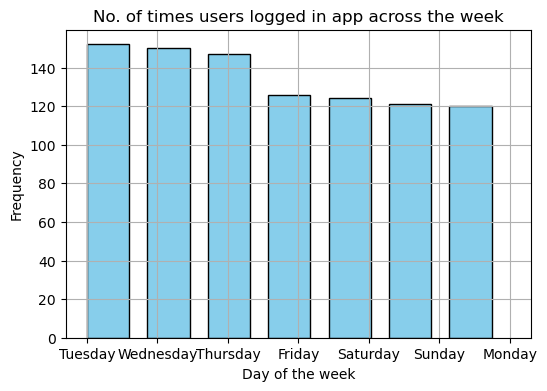

In [14]:
# import matplotlib package
import matplotlib.pyplot as plt

# plotting histogram
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df_activity.day_of_the_week, bins = 7, 
         width = 0.6, color = "skyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

- This histogram shows the frequency of logging in app across the week

1. User prefers logging in app mostly on Tuesday, Wednesday, and Thursday
2. The frequency of logging in drops from Friday to Monday

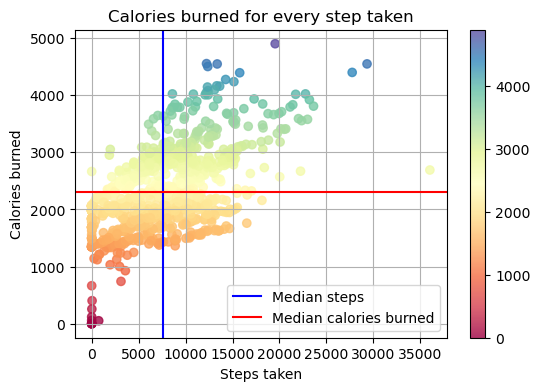

In [15]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(6,4)) # specify size of the chart
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# add annotations and visuals
median_calories = 2303
median_steps = 7637

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()

- The scatter plot shows the amount of calories burned for every step taken

1. The plot shows the positive correlation.
2. Most point showing the intensity of calories burned increases between the range of 0 and 15,000 steps, and the intensity decreases after more than 15,000 steps.
3. Outliers are possibly the reason of miscalculation, data contamination or human error.

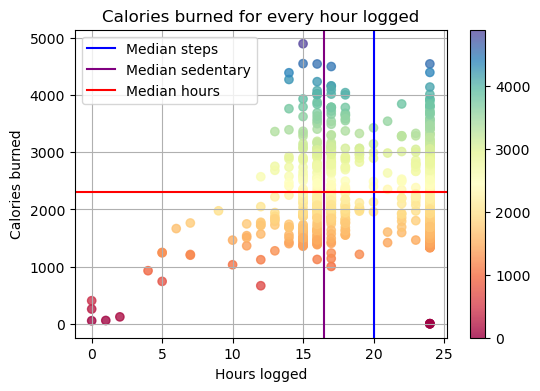

In [16]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(6,4)) # Specify size of the chart
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.8, c = df_activity.calories, 
            cmap = "Spectral")

# adding annotations and visuals
median_calories = 2303
median_hours = 20
median_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(median_hours, color = "Blue", label = "Median steps")
plt.axvline(median_sedentary, color = "Purple", label = "Median sedentary")
plt.axhline(median_calories, color = "Red", label = "Median hours")
plt.xlabel("Hours logged")
plt.ylabel("Calories burned")
plt.title("Calories burned for every hour logged")
plt.legend()
plt.grid(True)
plt.show()

- The scatter plot shows the amount of calories burned for hours logged in

1. The plot shows weak correlation compared to the previous scatter plot. This might be caused from users prefer logging in app while they are not moving (Sedentary hours). The purple median line also emphasizes this situation.
2. Few outliers also can be caused from users using the app when they are not moving.

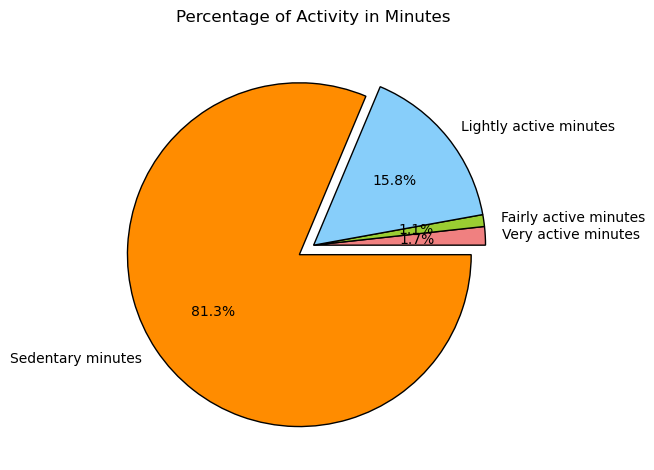

In [17]:
# calculating total of individual minutes column
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]
explode = [0, 0, 0, 0.1]
plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

1. Pie chart proves that more than 80% of users log in the FitBit app while they are not moving, daily commute or running errands.

2. About 1.1% of users use this app when they are fairly active activity and 1.7% of users use it when they are doing exercise.

- It can be concluded that most of the users do not use the FitBit app to track fitness. 

# Step 6: ACT

#### Now, it is time for answering the business objectives.

1. What are some trends in smart device usage?

- Most of the users (more than 80%) are using FitBit app to track sedentary activities and not using it for tracking fitness

- Users prefer to log in app during weekdays compared to weekends. It means that they rather stay at home or inside during weekends and spend more time outside on weekdays.

2. How could these trends apply to Bellabeat customers?

- Since FitBit and Bellabeat is aiming to make female users focus on tracking health, habit and fitness data and understand the current situation leading to smart decisions, this analysis can be well applied to bellabeat customers.

3. How could these trends help influence Bellabeat marketing strategy?

- It is recommended that Bellabeat marketing team should focus on providing detailed information how to use the app and how this knowledge can lead them to good health decisions. 

- Adding interesting functions to app such as providing specific exercise for short time that they can easily follow during the weekdays and weekends as well.

- Encouraging customers to exercise during the weekends by sendnig a notification.

### References
- This notebook is created by learning and referencing from the following notebook:

https://github.com/katiehuangx/Google-Data-Analytics-Capstone/blob/main/bellabeat-data-analysis.ipynb